In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('query-result.csv')

In [3]:
df = df.iloc[1: , :]

In [6]:
df = df.sort_values(by=['classCount'], ascending=False)

In [7]:
df

class  classCount
10             http://yago-knowledge.org/resource/Human      619061
13                              http://schema.org/Movie       53830
659                        http://schema.org/MusicAlbum       31523
28                 http://schema.org/AdministrativeArea       22041
47                       http://schema.org/CreativeWork       15434
...                                                 ...         ...
2601           http://yago-knowledge.org/resource/Piste           1
3461   http://yago-knowledge.org/resource/Plant_nursery           1
246              http://yago-knowledge.org/resource/Art           1
3462  http://yago-knowledge.org/resource/Rowing_at_t...           1
3664  http://yago-knowledge.org/resource/Districts_o...           1

[3665 rows x 2 columns]

In [15]:
df = df.iloc[: , :-1]

In [8]:
df.columns

Index(['class', 'classCount'], dtype='object')

In [9]:
df[' "class" ']

KeyError: ' "class" '

In [8]:
df[' "classCount" ']

1       "4" 
2       "4" 
3       "1" 
4       "3" 
5       "3" 
       ...  
563     "1" 
564     "1" 
565     "1" 
566     "1" 
567     "1" 
Name:  "classCount" , Length: 567, dtype: object

In [9]:
df = df.rename(columns={' "class" ': "class", ' "classCount" ': "classCount"})

In [10]:
df['classCount'] = df['classCount'].apply(lambda x: int(x.strip().replace('"','')))

AttributeError: 'int' object has no attribute 'strip'

In [11]:
df ['class'] = df['class'].apply(lambda x: x.strip().replace('"','').split('/')[-1].split('#')[-1])

In [12]:
df

class  classCount
10                        Human      619061
13                        Movie       53830
659                  MusicAlbum       31523
28           AdministrativeArea       22041
47                 CreativeWork       15434
...                         ...         ...
2601                      Piste           1
3461              Plant_nursery           1
246                         Art           1
3462  Rowing_at_the_Asian_Games           1
3664         Districts_of_Syria           1

[3665 rows x 2 columns]

In [13]:
import plotly.express as px
fig = px.pie(df, values='classCount', names='class')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=15)
fig.show()

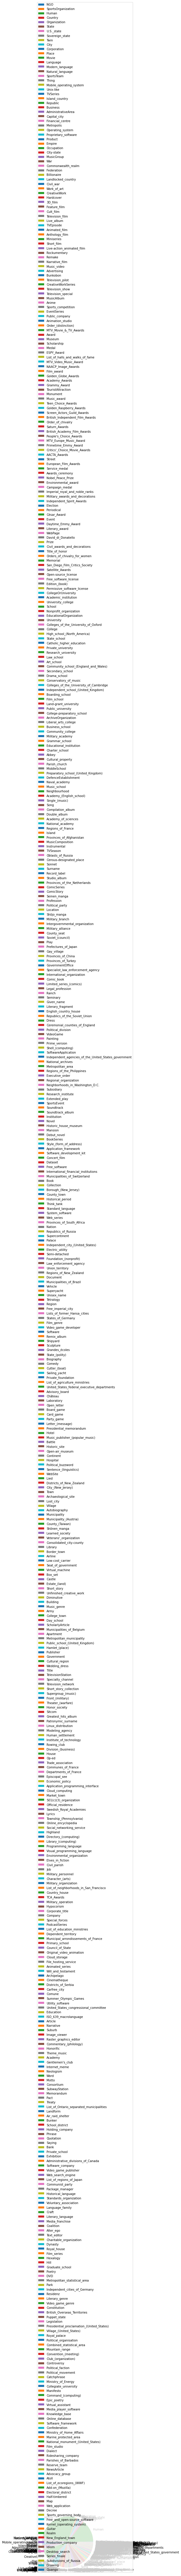

In [79]:
plt.pie(df['classCount'])
plt.legend(df['class'],loc=3)
plt.show()

In [73]:
df.plot.pie(y='class', figsize=(11, 6))

TypeError: '<' not supported between instances of 'str' and 'int'

<AxesSubplot:ylabel='Frequency'>

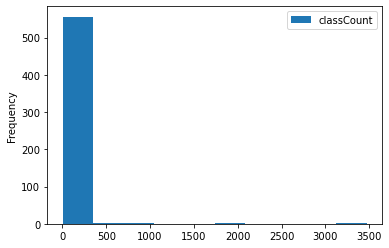

In [77]:
df.plot.hist()